# Business Problem


#### To predict the impact of the incident raised by customer.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA) 

In [2]:
#Read data
data = pd.read_csv('incident_event_log.csv')  
data.sample(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
105049,INC0025468,New,True,0,0,0,True,Caller 487,Opened by 24,03-05-2016 14:27,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 155,04-05-2016 10:04,09-05-2016 10:07
134423,INC0032917,Closed,False,0,0,3,True,Caller 5151,Opened by 17,25-05-2016 10:20,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 177,25-05-2016 14:30,30-05-2016 15:07
120717,INC0029417,New,True,1,0,1,True,Caller 2819,Opened by 305,13-05-2016 21:44,...,False,Do Not Notify,?,?,?,?,code 3,Resolved by 134,13-05-2016 21:47,18-05-2016 22:07
49749,INC0011355,New,True,0,0,0,True,Caller 5382,Opened by 443,25-03-2016 04:32,...,False,Do Not Notify,?,?,?,?,code 7,Resolved by 189,25-03-2016 04:46,30-03-2016 04:59
135811,INC0033311,Active,True,1,0,2,True,Caller 3330,Opened by 301,27-05-2016 11:32,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 30,03-06-2016 09:53,08-06-2016 10:07


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [4]:
# Replacing ''?" with nan
data1 = data.replace('?', np.nan)

In [5]:
data1.sample(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
9290,INC0002138,New,True,5,0,7,True,Caller 723,NaN,03-03-2016 17:25,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 62,31-05-2016 15:45,05-06-2016 16:07
138292,INC0033951,Closed,False,2,0,6,True,Caller 3790,Opened by 17,30-05-2016 16:53,...,True,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 27,01-06-2016 08:36,06-06-2016 09:07
91072,INC0021907,Active,True,0,0,1,True,Caller 3548,Opened by 463,23-04-2016 01:44,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 199,23-04-2016 01:52,28-04-2016 02:07
140572,INC0083078,Active,True,0,0,0,True,Caller 4316,Opened by 141,03-11-2016 10:10,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 68,03-11-2016 10:27,08-11-2016 11:00
76261,INC0018079,Awaiting User Info,True,0,0,6,True,Caller 2459,Opened by 17,12-04-2016 11:29,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 9,Resolved by 231,13-04-2016 14:03,18-04-2016 14:07


<AxesSubplot:>

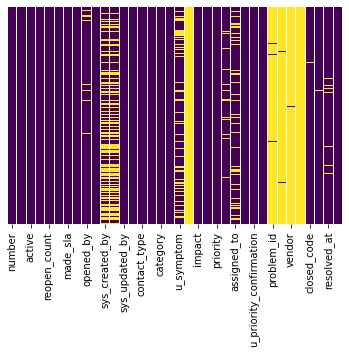

In [6]:
#Vizuvalizing of null values
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### From this Heat Map, Dataset contains more missing values.


In [7]:
# Checking percentages of missing values in the given dataset.
print('percentage of missing values'.upper())
data1.isnull().sum()/data1.shape[0]*100 

PERCENTAGE OF MISSING VALUES


number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

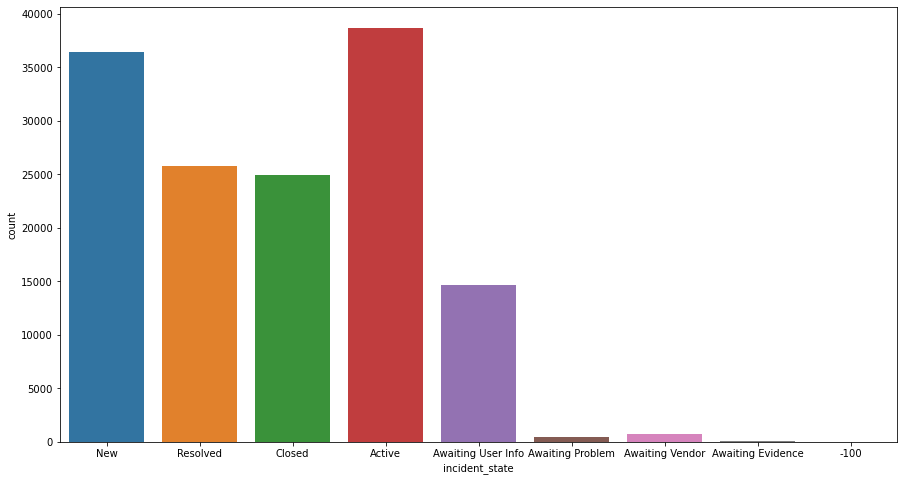

In [8]:
#Countplot for incident_state
plt.figure(figsize=(15,8))
sns.countplot(x='incident_state',data=data1)
plt.show()

#### Most of the incident states are in active state.

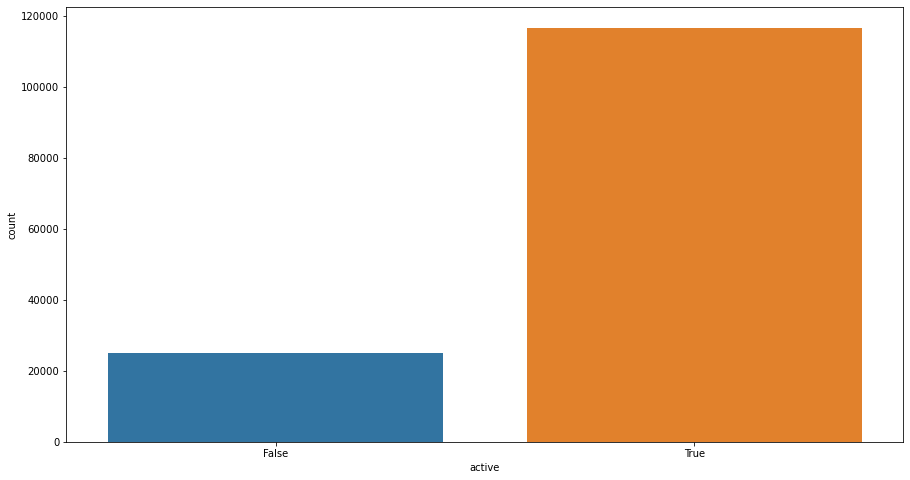

In [9]:
#Countplot for active
plt.figure(figsize=(15,8))
sns.countplot(x='active',data=data1)
plt.show()

#### Proportion of high impact on active cases.

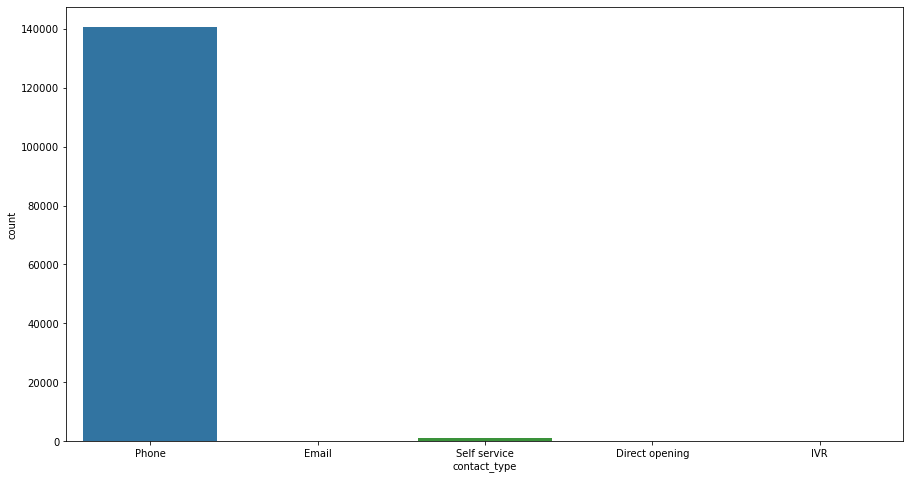

In [10]:
#Countplot for contact_type
plt.figure(figsize=(15,8))
sns.countplot(x='contact_type',data=data1)
plt.show()

#### Most of the Incidents registered through mobile which has high impact.

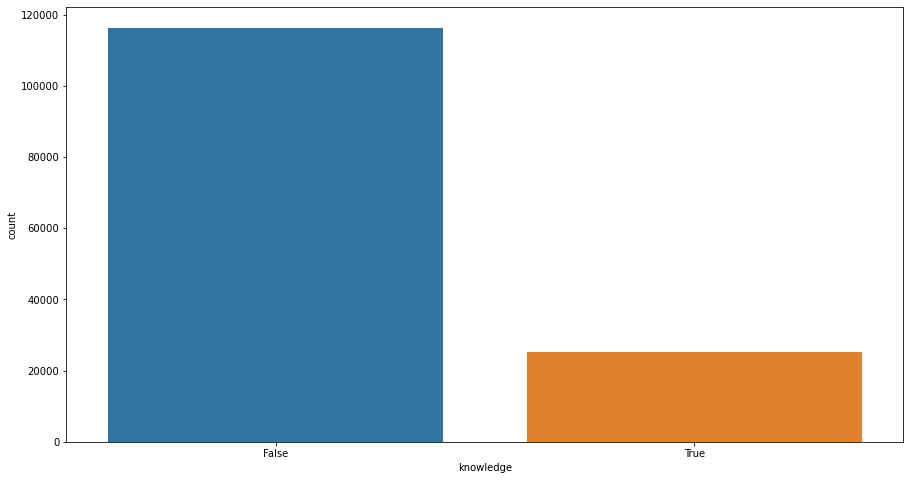

In [11]:
#Countplot for knowledge
plt.figure(figsize=(15,8))
sns.countplot(x='knowledge',data=data1)
plt.show()

#### Proportion of high impact while working according to dataset.

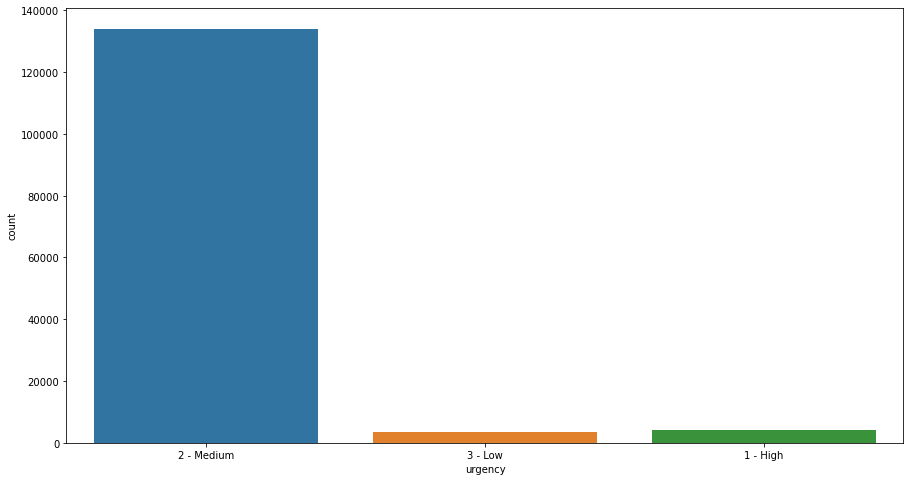

In [12]:
#Countplot for urgency
plt.figure(figsize=(15,8))
sns.countplot(x='urgency',data=data1)
plt.show()

#### Most of the incidents are 2-Medium level urgency.

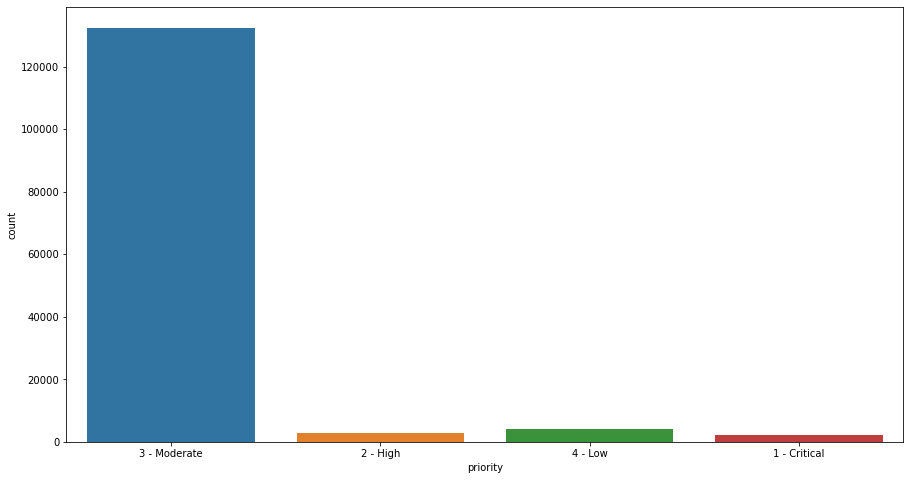

In [13]:
#Countplot for priority
plt.figure(figsize=(15,8))
sns.countplot(x='priority',data=data1)
plt.show()

#### Most of the incidents are 3-Moderate state priority.

In [14]:
# Relationship Analysis

correlation = data.corr()
correlation

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,knowledge,u_priority_confirmation
active,1.000000,0.043323,0.019083,-0.097202,0.565501,0.043711,-0.488946
reassignment_count,0.043323,1.000000,0.160193,0.527919,-0.089037,0.082968,-0.000441
reopen_count,0.019083,0.160193,1.000000,0.247292,-0.015880,0.006847,0.131248
sys_mod_count,-0.097202,0.527919,0.247292,1.000000,-0.241942,0.065103,0.185867
made_sla,0.565501,-0.089037,-0.015880,-0.241942,1.000000,-0.073070,-0.232037
knowledge,0.043711,0.082968,0.006847,0.065103,-0.073070,1.000000,-0.221054
u_priority_confirmation,-0.488946,-0.000441,0.131248,0.185867,-0.232037,-0.221054,1.000000


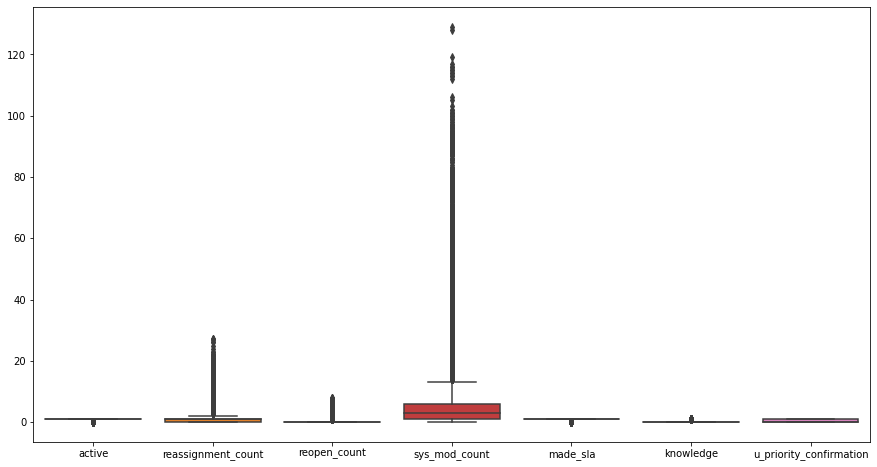

In [15]:
#Vizuvalizing out liers
plt.figure(figsize=(15,8))
data=data1.iloc[:,1:]
sns.boxplot(data=data)
plt.show()

#### From these Box Plots, Dataset contains More outliers.

In [16]:
#droping of unwanted features
data1.drop(['number','opened_by','sys_created_by','sys_created_at','sys_updated_by','sys_updated_at','cmdb_ci','problem_id',
           'rfc','vendor','caller_id','assignment_group','assigned_to','resolved_by','caused_by','closed_code',
           'closed_at'],axis=1,inplace=True)

In [17]:
#checking of null values
data1.isnull().sum()

incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
opened_at                      0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
knowledge                      0
u_priority_confirmation        0
notify                         0
resolved_at                 3141
dtype: int64

<AxesSubplot:>

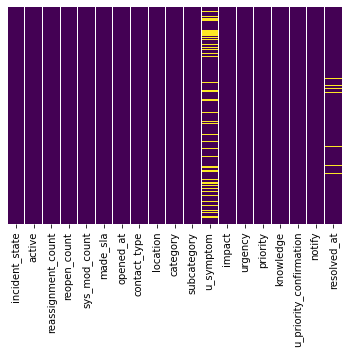

In [18]:
#Vizuvalizing of null values
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### From this Heat Map, Dataset contains few missing values.

In [19]:
#Random Sampling Imputation for 'u_symptom' feature
data1['u_symptom'].dropna().sample(data1['u_symptom'].isnull().sum(),random_state=0).head()

118039    Symptom 491
112962    Symptom 115
73885     Symptom 534
64338     Symptom 102
39846     Symptom 491
Name: u_symptom, dtype: object

In [20]:
random_sample=data1['u_symptom'].dropna().sample(data1['u_symptom'].isnull().sum(),random_state=0)

random_sample.index=data1[data1['u_symptom'].isnull()].index
data1.loc[data1['u_symptom'].isnull(),'u_symptom']=random_sample

In [21]:
#Mode Imputaion for 'location','category','subcategory'
data1['location'].fillna(data1['location'].mode()[0],inplace=True)
data1['category'].fillna(data1['category'].mode()[0],inplace=True)
data1['subcategory'].fillna(data1['subcategory'].mode()[0],inplace=True)

In [22]:
#checking of null values
data1.isnull().sum()

incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
opened_at                     0
contact_type                  0
location                      0
category                      0
subcategory                   0
u_symptom                     0
impact                        0
urgency                       0
priority                      0
knowledge                     0
u_priority_confirmation       0
notify                        0
resolved_at                3141
dtype: int64

In [23]:
data1

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,resolved_at
0,New,True,0,0,0,True,29-02-2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29-02-2016 11:29
1,Resolved,True,0,0,2,True,29-02-2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29-02-2016 11:29
2,Resolved,True,0,0,3,True,29-02-2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29-02-2016 11:29
3,Closed,False,0,0,4,True,29-02-2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29-02-2016 11:29
4,New,True,0,0,0,True,29-02-2016 04:40,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,01-03-2016 09:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,Closed,False,1,0,4,True,16-02-2017 09:09,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,False,True,Do Not Notify,16-02-2017 09:53
141708,Active,True,0,0,0,True,16-02-2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,False,False,Do Not Notify,16-02-2017 16:38
141709,Active,True,1,0,1,True,16-02-2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,False,False,Do Not Notify,16-02-2017 16:38
141710,Resolved,True,1,0,2,True,16-02-2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,False,True,Do Not Notify,16-02-2017 16:38


In [24]:
#changing date-time datatype
data1['opened_at']=pd.to_datetime(data1['opened_at'])
data1[['resolved_at']]=pd.to_datetime(data1['resolved_at'])

In [25]:
d=np.round((data1['resolved_at']-data1['opened_at']) / np.timedelta64(1,'M'),4)
date=pd.concat([data1['opened_at'],data1['resolved_at'],d],axis=1)
date.columns=['opened_at','resolved_at','resolved_months']
date.sample(5)

,opened_at,resolved_at,resolved_months
5129,2016-02-03 12:21:00,2016-01-06 09:12:00,-0.9242
71549,2016-08-04 09:38:00,2016-12-04 12:51:00,4.0127
134080,2016-05-25 08:33:00,2016-05-25 13:46:00,0.0071
81144,2016-04-14 16:20:00,2016-04-15 11:20:00,0.0260
109901,2016-05-05 22:27:00,2016-05-17 10:59:00,0.3786


In [26]:
date[date['resolved_months']<=0].count()

opened_at          28502
resolved_at        28502
resolved_months    28502
dtype: int64

In [27]:
for i,v in enumerate(date['resolved_months'],0):
    while v <=0:
            date.loc[i,'resolved_at']=date.loc[i,'resolved_at']+ np.timedelta64(31, 'D')
            v = np.round((date.loc[i,'resolved_at']-date.loc[i,'opened_at']) / np.timedelta64(1,'M'),4)

In [28]:
data1[['opened_at','resolved_at']].sample(5)

,opened_at,resolved_at
59223,2016-03-31 17:49:00,2016-05-04 16:42:00
2559,2016-01-03 14:00:00,2016-09-03 14:41:00
34510,2016-03-16 10:57:00,2016-03-17 10:50:00
38575,2016-03-18 09:21:00,2016-03-24 15:38:00
130508,2016-05-23 08:18:00,2016-05-23 09:19:00


In [29]:
date['resolved_Months']=np.round((date['resolved_at']-date['opened_at']) / np.timedelta64(1,'M'),4)
date.sample(5)

,opened_at,resolved_at,resolved_months,resolved_Months
1655,2016-01-03 09:15:00,2016-03-03 11:56:00,1.9750,1.9750
59386,2016-01-04 01:11:00,NaT,NaN,NaN
108304,2016-05-05 09:58:00,2016-05-05 10:03:00,0.0001,0.0001
63949,2016-04-04 13:29:00,2016-04-04 15:06:00,0.0022,0.0022
126957,2016-05-18 22:59:00,2016-07-06 11:35:00,1.5943,1.5943


In [30]:
date['resolved_Months'].fillna(method='ffill',inplace=True)

In [31]:
#checking of null values
date['resolved_Months'].isnull().sum()

0

In [32]:
#droping of unwanted features
data1.drop(columns=['opened_at','resolved_at'],inplace=True)

In [33]:
#appending of wanted feature
data1.insert(5,'resolved_in_months',date['resolved_Months'])

In [34]:
#checking of null values
data1.isnull().sum().sum()

0

<AxesSubplot:>

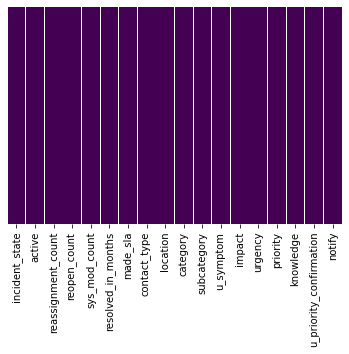

In [35]:
#Vizuvalizing of null values

sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Feature Engineering

In [36]:
data1['knowledge'] = np.where(data1['knowledge']==True,1,0)
data1['notify'] = np.where(data1['notify']=='Send Email',1,0)
data1['active'] = np.where(data1['active']==True,1,0)
data1['made_sla'] = np.where(data1['made_sla']==True,1,0)
data1['u_priority_confirmation'] = np.where(data1['u_priority_confirmation']==True,1,0)

In [37]:
#unique values
print(data1.nunique())

incident_state                9
active                        2
reassignment_count           28
reopen_count                  9
sys_mod_count               115
resolved_in_months         7866
made_sla                      2
contact_type                  5
location                    224
category                     58
subcategory                 254
u_symptom                   525
impact                        3
urgency                       3
priority                      4
knowledge                     2
u_priority_confirmation       2
notify                        2
dtype: int64


In [38]:
dic={'2 - Medium':0,'3 - Low':1,'1 - High':2 }
data1['impact']=data1['impact'].map(dic)

In [39]:
dic={'Not Available':0,'Active':1,'Awaiting Problem':2,'Awaiting Vendor':3,'Awaiting User info':4,'Awaiting Evidence':5,
     'Closed':6,'New':7,'Resolved':8}
data1['incident_state']=data1['incident_state'].map(dic)

In [40]:
dic={'Direct opening':0,'IVR':1,'Email':2,'Self service':3,'Phone':4}
data1['contact_type']=data1['contact_type'].map(dic)

In [41]:
data1.sample(5)

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,resolved_in_months,made_sla,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify
116935,8.0,1,0,0,2,0.0016,1,4,Location 204,Category 53,Subcategory 174,Symptom 491,0,2 - Medium,3 - Moderate,0,1,0
118811,6.0,0,1,0,3,0.0001,1,4,Location 179,Category 57,Subcategory 170,Symptom 595,0,2 - Medium,3 - Moderate,0,1,0
16770,NaN,1,1,0,3,0.6901,1,4,Location 38,Category 37,Subcategory 123,Symptom 607,0,2 - Medium,3 - Moderate,1,0,0
107597,8.0,1,0,0,1,0.0001,1,4,Location 161,Category 53,Subcategory 174,Symptom 491,0,2 - Medium,3 - Moderate,0,1,0
52646,1.0,1,0,0,2,0.0278,1,4,Location 161,Category 9,Subcategory 164,Symptom 495,0,2 - Medium,3 - Moderate,0,0,0


In [42]:
# Label encoding
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data1['location'] = label.fit_transform(data1['location'])
data1['category'] = label.fit_transform(data1['category'])
data1['subcategory'] = label.fit_transform(data1['subcategory'])
data1['u_symptom'] = label.fit_transform(data1['u_symptom'])
data1['urgency'] = label.fit_transform(data1['urgency'])
data1['priority'] = label.fit_transform(data1['priority'])
data1['contact_type'] = label.fit_transform(data1['contact_type'])
data1['incident_state']=label.fit_transform(data1['incident_state'])
data1.sample(5)

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,resolved_in_months,made_sla,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify
92914,6,1,0,0,0,0.0005,1,4,59,9,73,365,0,1,2,0,0,0
137767,4,0,1,0,5,0.0001,1,4,197,25,171,382,0,1,2,0,1,0
48616,5,1,2,0,2,0.0056,1,4,104,44,73,365,0,1,2,0,0,0
114984,4,0,3,0,13,2.0082,1,4,179,36,157,109,0,1,2,0,1,0
140951,6,1,0,0,12,4.0437,1,3,43,35,151,368,0,1,2,0,1,0


In [43]:
data1.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'resolved_in_months', 'made_sla', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'knowledge', 'u_priority_confirmation', 'notify'],
      dtype='object')

In [44]:
#standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scl=scaler.fit_transform(data1[['location','category','subcategory','u_symptom']])

In [45]:
scaled=pd.DataFrame(scl,columns=['location','category','subcategory','u_symptom'])
scaled.sample(5)

,location,category,subcategory,u_symptom
98884,0.542601,0.298246,0.288538,0.696565
100021,0.031390,0.122807,0.241107,0.637405
84797,0.874439,0.228070,0.288538,0.696565
24778,0.264574,0.263158,0.288538,0.696565
38460,0.264574,0.263158,0.660079,0.696565


In [46]:
x=pd.concat([data1[['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'resolved_in_months', 'made_sla', 'contact_type', 'urgency',
       'priority', 'knowledge', 'u_priority_confirmation', 'notify']],scaled],axis=1)

In [47]:
x = x.drop(columns=['location', 'category', 'subcategory', 'u_symptom'])
y = data1.impact

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#splitting of train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)

In [50]:
x_train.shape

(99198, 13)

In [51]:
y_train.shape

(99198,)

In [52]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
fe = pd.Series(model.feature_importances_)
fe.index = x_train.columns
fe.sort_values(ascending=False)

priority                   0.873694
urgency                    0.105274
resolved_in_months         0.016140
sys_mod_count              0.002206
incident_state             0.000919
knowledge                  0.000740
reassignment_count         0.000695
u_priority_confirmation    0.000290
made_sla                   0.000026
active                     0.000017
reopen_count               0.000000
contact_type               0.000000
notify                     0.000000
dtype: float64

<AxesSubplot:>

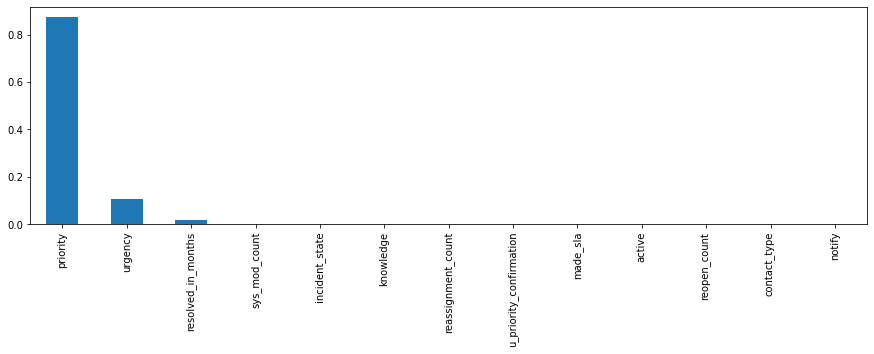

In [54]:
#Vizuvalizing of  important features
fe.sort_values(ascending=False).plot.bar(figsize=(15, 4))

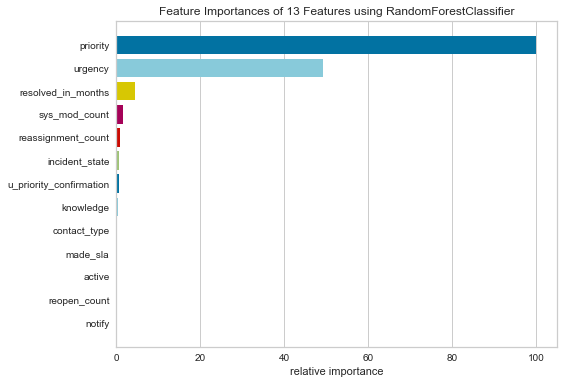

<AxesSubplot:title={'center':'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [55]:
from yellowbrick.features import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
viz=FeatureImportances(clf)
viz.fit(x,y)
viz.poof()

# Model Building

In [56]:
#Decision Tree
DTC = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [57]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [58]:
# Predict for 1 observation
DTC.predict(x_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
DTC.predict(x_test[0:17])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
# The score method returns the accuracy of the model
score = DTC.score(x_test, y_test)
print(score)

0.9869454767841181


In [60]:
y_pred = DTC.predict(x_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[39712    51   496]
 [    8  1164     0]
 [    0     0  1083]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40259
           1       0.96      0.99      0.98      1172
           2       0.69      1.00      0.81      1083

    accuracy                           0.99     42514
   macro avg       0.88      0.99      0.93     42514
weighted avg       0.99      0.99      0.99     42514

0.9869454767841181


In [62]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=20,criterion='gini',random_state=1,max_depth=3)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

In [63]:
y_pred=RFC.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[40208    51     0]
 [   95  1077     0]
 [ 1083     0     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     40259
           1       0.95      0.92      0.94      1172
           2       0.00      0.00      0.00      1083

    accuracy                           0.97     42514
   macro avg       0.64      0.64      0.64     42514
weighted avg       0.95      0.97      0.96     42514

0.9710918756174437


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [66]:
ID = load_iris()

In [67]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [68]:
# Loop over K values
for i, k in enumerate(neighbors):
    KNN= KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)

In [69]:
 # Compute train and test data accuracy
train_accuracy[i] = KNN.score(x_train, y_train)
test_accuracy[i] = KNN.score(x_test, y_test)

In [70]:
# Calculate the accuracy of the model
print(KNN.score(x_test, y_test))  

0.9833701839394082


In [71]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [72]:
y_pred  =NB.predict(x_test)

In [73]:
 y_pred  

array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

In [74]:
y_test

115643    0
72508     0
131125    0
7309      2
128822    0
         ..
132802    0
9434      0
91785     0
98154     0
49303     0
Name: impact, Length: 42514, dtype: int64

In [75]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[39683    55   521]
 [    0  1153    19]
 [    0     0  1083]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40259
           1       0.95      0.98      0.97      1172
           2       0.67      1.00      0.80      1083

    accuracy                           0.99     42514
   macro avg       0.87      0.99      0.92     42514
weighted avg       0.99      0.99      0.99     42514

0.9860046102460366


In [76]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
state = 12  
test_size = 0.30  
  
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,  
    test_size=test_size, random_state=state)

In [78]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.969
Accuracy score (validation): 0.971
Learning rate:  0.075
Accuracy score (training): 0.976
Accuracy score (validation): 0.977
Learning rate:  0.1
Accuracy score (training): 0.986
Accuracy score (validation): 0.986
Learning rate:  0.25
Accuracy score (training): 0.996
Accuracy score (validation): 0.996
Learning rate:  0.5
Accuracy score (training): 0.981
Accuracy score (validation): 0.981
Learning rate:  0.75
Accuracy score (training): 0.943
Accuracy score (validation): 0.947
Learning rate:  1
Accuracy score (training): 0.243
Accuracy score (validation): 0.241


In [79]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[28058    28   220]
 [   89   697     0]
 [  233     0   435]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28306
           1       0.96      0.89      0.92       786
           2       0.66      0.65      0.66       668

    accuracy                           0.98     29760
   macro avg       0.87      0.84      0.86     29760
weighted avg       0.98      0.98      0.98     29760



In [80]:
#XGBM
from xgboost import XGBClassifier

In [81]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [82]:
score = xgb_clf.score(x_val, y_val)
print(score)

0.9995295698924731


#### Considering XGB Classifier as it has given the best accuracy of 99.99%

In [83]:
import pickle

file=open('project_incident_impact1.pkl','wb')
pickle.dump(xgb_clf,file)
file.close()